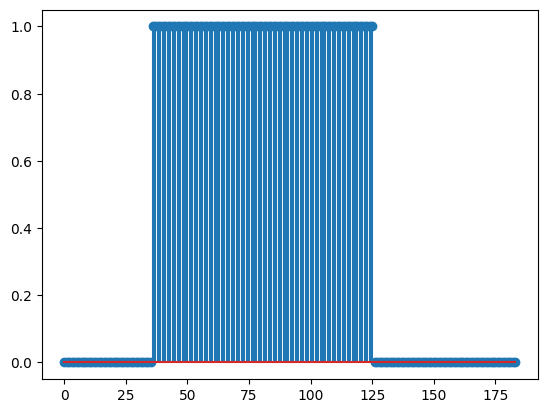

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 2048

def ece420ProcessFrame(frame):
    isVoiced = 0

    sum = 0
    #### YOUR CODE HERE ####
    for i in range(len(frame)):
        sum += frame[i]**2
    return sum > 3*1e9


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

[   0  785 1610 2281 2401 3082 3214 3994 4786 4918 5599 5719 6390 7215]


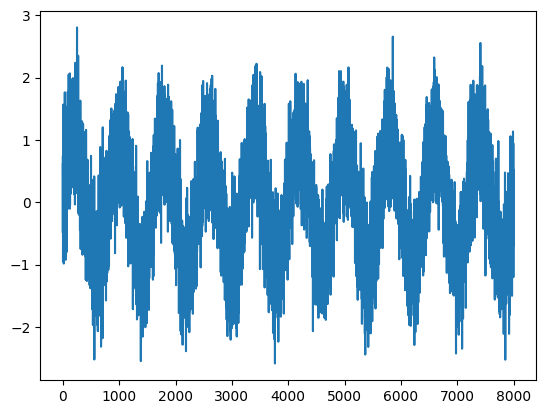

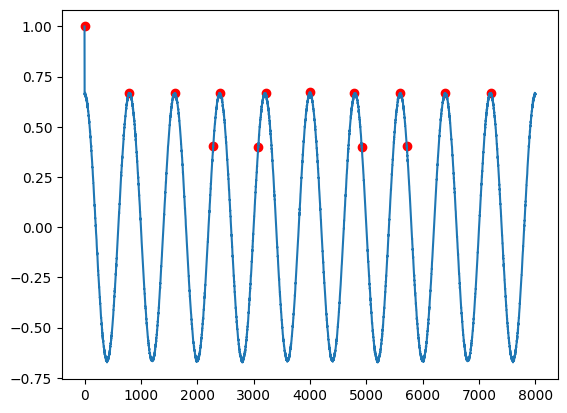

In [65]:

import numpy as np
import matplotlib.pyplot as plt



def autoCor(tune,sum):

    b = np.fft.fft(tune)
    a = np.conjugate(b)
    return np.fft.ifft(a*b)/sum

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.plot(np.arange(len(tune)), tune)

# Start a new figure for your autocorrelation plot 
plt.figure() 


def better_peak_detection(sig,thresh):
    peaks = []
    search = False
    maxVal = -1000 #big negative
    maxidx = -1
    for i in range(0, len(sig)):
        if(sig[i] >= thresh):
            search = True

        if sig[i] <= thresh and search == True :
            search = False
            peaks.append(maxidx)
            maxVal = -1000
        if search == True:
            if(sig[i]> maxVal):
                maxidx = i
                maxVal = sig[i]

    return np.array(peaks)

# Your code here

a = autoCor(tune, np.sum(np.square(tune)))
timestamps = np.arange(len(a))
plt.plot(timestamps, a)
max_peaks = better_peak_detection(a,0.4)
print(max_peaks)
plt.scatter(max_peaks, a[max_peaks], color = 'red')
plt.show()

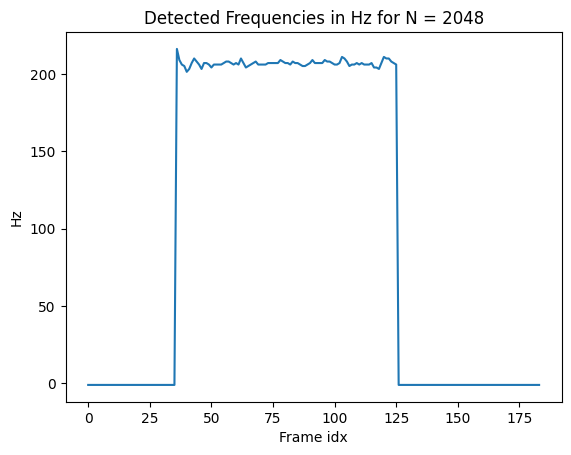

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

FRAME_SIZE = 2048

################## YOUR CODE HERE ######################


def autoCor(tune,sum):
    b = np.fft.fft(tune)
    a = np.conjugate(b)
    return np.fft.ifft(a*b)/sum

def better_peak_detection(sig,thresh):
    peaks = []
    search = False
    maxVal = -1000 #big negative
    maxidx = -1
    for i in range(0, len(sig)):
        if(sig[i] >= thresh):
            search = True

        if sig[i] <= thresh and search == True :
            search = False
            peaks.append(maxidx)
            maxVal = -1000
        if search == True:
            if(sig[i]> maxVal):
                maxidx = i
                maxVal = sig[i]

    return np.array(peaks)

def ece420ProcessFrame(frame, Fs, lim):
    sum = 0
    for i in range(len(frame)):
        sum += frame[i]**2

    if sum > lim*1e9:
        a = autoCor(frame, sum)
        peaks = better_peak_detection(a, 0.2)
        
        if(peaks.size <2):
            return -1

        for i in range(len(peaks)):
            if (peaks[i] < 172):
                continue
            else:
                return Fs/peaks[i]

    return -1


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs,3)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz for N = 2048')
plt.show()


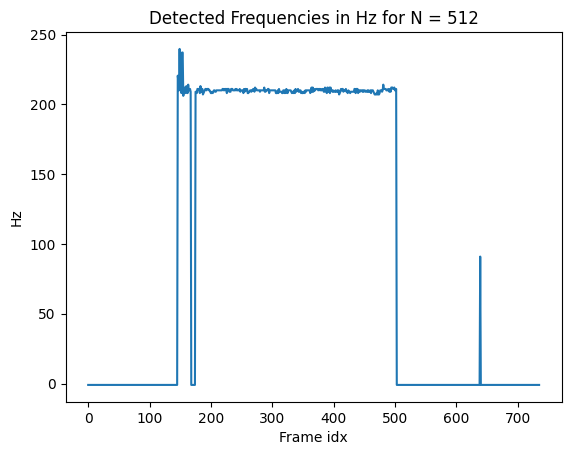

In [67]:
FRAME_SIZE = 512
Fs, data = read('test_vector.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs,1)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz for N = 512')
plt.show()

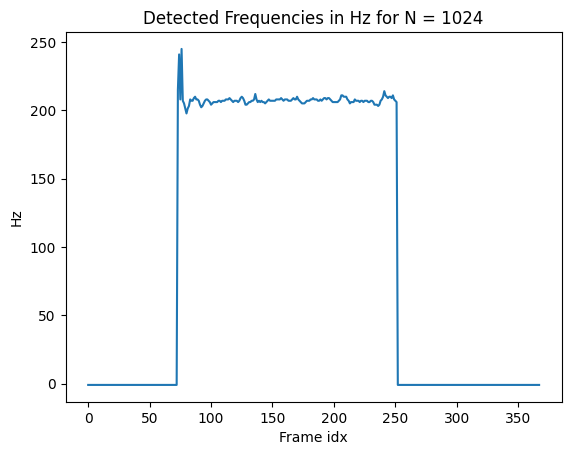

In [76]:
FRAME_SIZE = 1024
Fs, data = read('test_vector.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs, 1.73)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz for N = 1024')
plt.show()

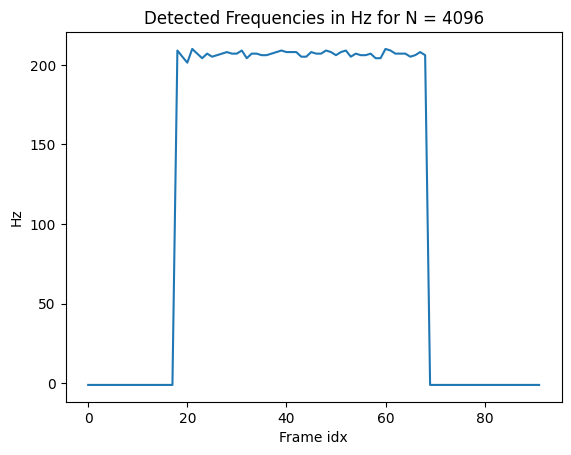

In [69]:
FRAME_SIZE = 4096
Fs, data = read('test_vector.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs, 3)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz for N = 4096')
plt.show()

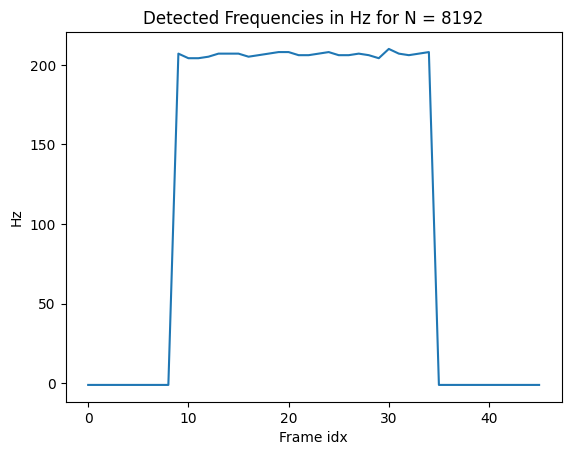

In [70]:
FRAME_SIZE = 8192
Fs, data = read('test_vector.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs,3)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz for N = 8192')
plt.show()

### ANSWER TO QUESTION  

## Question

# The autocorrelation for speech signals will be periodic with many candidate peaks. How do you decide which peak to use?  
  
  The first significant peak that is not due to the signals being initally overlapped when L is close to 0. In other the first peak that is due to overlapping the signals when there is a significant shift.

# The autocorrelation for any signal will be maximal in the neighborhood surrounding zero lag. How do you decide what to ignore?   

You set a threshold where you won't look for peaks when L is less than that threshold.

# Why did we choose 40 ms frames? 

The larger the frame the smaller frequencies we can detect via autocorrelation.